['greedy-ppr-collab', 'greedy-ppr-joint', 'greedy-ppr-kg'] [0.12945544554455446, 0.18473597359735972, 0.25742574257425743] [0.0030816583163338395, 0.013832625750146406, 0.034393967889384106]
['greedy-ppr-collab-rec', 'greedy-ppr-joint-rec', 'greedy-ppr-kg-rec'] [0.13242574257425743, 0.17879537953795377, 0.24059405940594059] [0.00453345111149048, 0.008421906182181279, 0.008391539363096449]


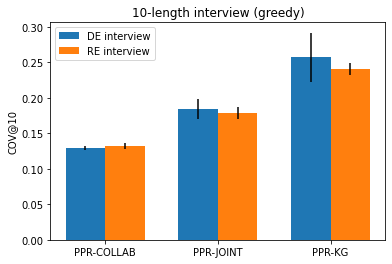

In [5]:
from requests import get
import matplotlib.pyplot as plt
import numpy as np

metric = 'cov'
cutoff = '10'
n_questions = 10

data = get(f'https://mindreader.tech/spectate/results/default_rec/{metric}/{cutoff}').json()

models = [key for key in data.keys() if key.endswith('-rec')]

fig, ax = plt.subplots()
ind = np.arange(3)

width = 0.35

# add with rec
for idx, (label, to_replace) in enumerate([('DE interview', '-rec'), ('RE interview', '')]):
    x = [model.replace(to_replace, '') for model in models]
    y = [np.mean(data[model][n_questions - 1]) for model in x]
    y_std = [np.std(data[model][n_questions - 1]) for model in x]
    
    print(x, y, y_std)
    ax.bar(ind + idx * width, y, yerr=y_std, width=width, label=label)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels([model.replace('-rec', '').replace('greedy-', '').upper() for model in models])
plt.ylabel(f'{metric.upper()}@{cutoff}')
plt.title(f'{n_questions}-length interview (greedy)')
plt.legend()
plt.savefig('re_vs_de.pdf', bbox_inches='tight')
plt.show()